# Describing Distributions
I will be analyzing & visualizing several features in the [Medical Dataset](https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data).

- The features to analyze: 
    - VitD_levels
    - Doc_visits
    - TotalCharge

- For each feature listed:
1) Plot a histogram with a kde (kernel density estimate)
    - Add a line for the mean (red)
    - Add a line for the median (green)
    - Add a line for for +1 std from the mean (black)
    - Add a line for the - 1 std from the mean (black)
    - Highlight the range between +1 and =1 std (yellow)

2) Answer the following questions:
    -Is it Discrete or Continuous?
    - Does it have a skew? If so, which direction (+/-)
    - What type of kurtosis does it display?
        - Using the Pearson calculation: 
            - Mesokurtic (Kurtosis ~3)
            - Leptokurtic (Kurtosis >3)     
            - Platykurtic (Kurtosis < 3) 

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
#Loading Dataset
df = pd.read_csv('Data/data.csv')
df.head(2)

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.40342
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.99812


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [11]:
# Filtering required features
df =df[['VitD_levels', 'Doc_visits', 'TotalCharge']]
df.head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


# VitD_levels


In [13]:
#Determing Kurtosis type 
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt


3.013147515833447

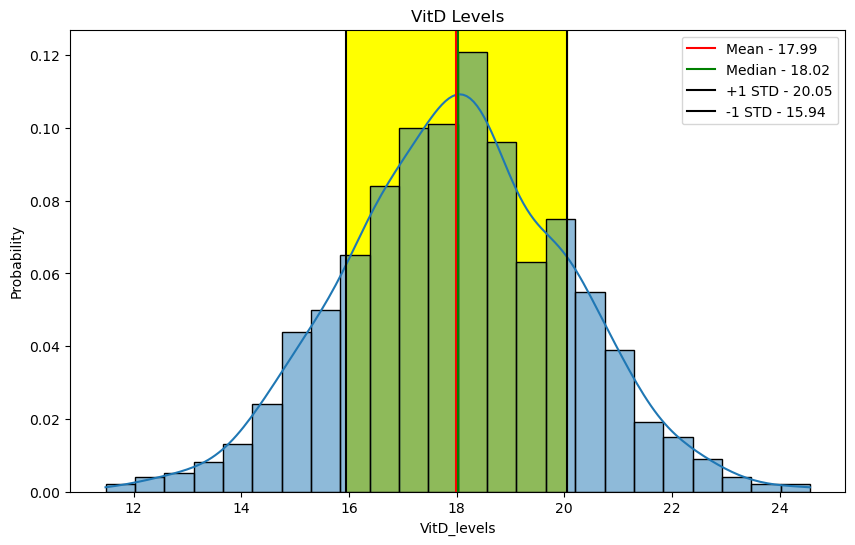

In [12]:
mean = df["VitD_levels"].mean()
median = df["VitD_levels"].median()
std = df["VitD_levels"].std()
plus_std = mean + std
minus_std = mean - std
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df["VitD_levels"], stat="probability", kde=True)
ax.axvline(mean, color="red", label=f"Mean - {mean:,.2f}")
ax.axvline(median, color="green", label = f"Median - {median:,.2f}")
ax.axvline(plus_std, color="black", label=f"+1 STD - {plus_std:,.2f}")
ax.axvline(minus_std, color="black", label=f"-1 STD - {minus_std:,.2f}")
ax.axvspan(plus_std, minus_std, color="yellow", zorder=0)
ax.set_title("VitD Levels")
ax.legend();

1) Is it Discrete or Continuous?
    - Continuous
2) Does it have a skew? If so, which direction (+/-)
    - Doesn't have a skew
3) What type of kurtosis does VitD_Levels display?
    - Mesokurtic (Kurtosis ~3)

# Doc_visits

In [15]:
#Determing Kurtosis type 
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

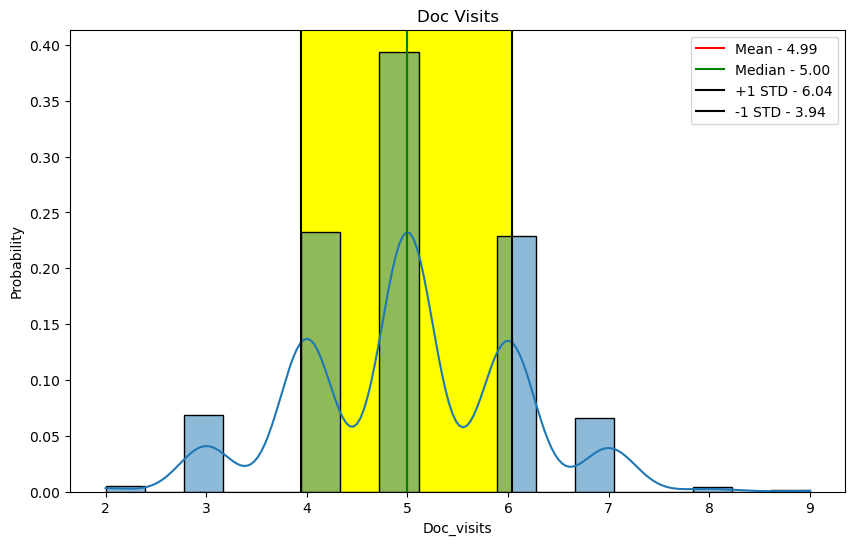

In [16]:
mean = df["Doc_visits"].mean()
median = df["Doc_visits"].median()
std = df["Doc_visits"].std()
plus_std = mean + std
minus_std = mean - std
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(df["Doc_visits"], stat="probability", kde=True)
ax.axvline(mean, color="red", label=f"Mean - {mean:,.2f}")
ax.axvline(median, color="green", label = f"Median - {median:,.2f}")
ax.axvline(plus_std, color="black", label=f"+1 STD - {plus_std:,.2f}")
ax.axvline(minus_std, color="black", label=f"-1 STD - {minus_std:,.2f}")
ax.axvspan(plus_std, minus_std, color="yellow", zorder=0)
ax.set_title("Doc Visits")
ax.legend();

1) Is it Discrete or Continuous?
    - Discrete
2) Does it have a skew? If so, which direction (+/-)
    - Has a slight positive skew
3) What type of kurtosis does Doc_visits display?
    - Mesokurtic (Kurtosis ~3)

# TotalCharge

In [17]:
#Determining kurtosis type
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

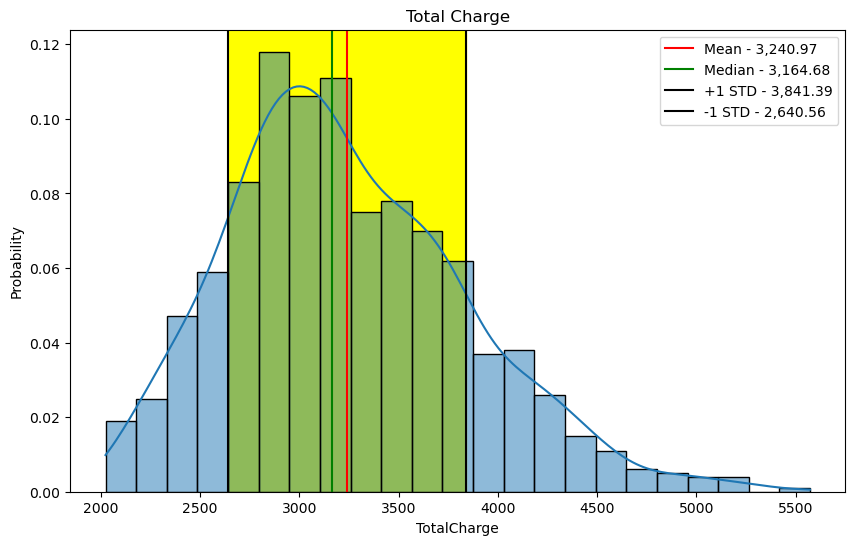

In [18]:
mean = df["TotalCharge"].mean()
median = df["TotalCharge"].median()
std = df["TotalCharge"].std()
plus_std = mean + std
minus_std = mean - std
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df["TotalCharge"], stat="probability", kde=True)
ax.axvline(mean, color="red", label=f"Mean - {mean:,.2f}")
ax.axvline(median, color="green", label=f"Median - {median:,.2f}")
ax.axvline(plus_std, color="black", label=f"+1 STD - {plus_std:,.2f}")
ax.axvline(minus_std, color="black", label=f"-1 STD - {minus_std:,.2f}")
ax.axvspan(plus_std, minus_std, color="yellow", zorder=0)
ax.set_title("Total Charge")
ax.legend();

1) Is it Discrete or Continuous?
    - Continuous
2) Does it have a skew? If so, which direction (+/-)
    - Has a positive skew
3) What type of kurtosis does TotalCharge display?
    - Leptokurtic (Kurtosis >3)